In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def GeneratePathsGBMABM(NumPaths, NumSteps, T, r, sigma, S_init):
    
    # FIXING RANDOM SEED
    np.random.seed(100)
    
    # INITIALISATION OF MATRICES
    Z = np.random.normal(0.0, 1.0, [NumPaths, NumSteps])
    X = np.zeros([NumPaths, NumSteps + 1])
    S = np.zeros([NumPaths, NumSteps + 1])
    time = np.zeros(NumSteps + 1)
    
    # FOR ALL PATHS, THE INITIAL X IS THE LOG OF THE INITIAL S
    X[:,0] = np.log(S_init)
    
    # DEFINITION OF TIME STEPS
    dt = T / float(NumSteps)
    
    for i in range(NumSteps):
        # SHIFT SAMPLES SO THAT THE MEAN IS ZERO AND VARIANCE IS ONE
        if NumPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:, i])) / np.std(Z[:, i])
        
        # SIMULATE PATHS FOR X
        X[:,i + 1] = X[:, i] + (r - 0.5 * sigma**2) * dt + sigma * np.power(dt, 0.5) * Z[:, i]
        time[i + 1] = time[i] + dt
        
    # COMPUTE EXPONENT OF ABM
    S = np.exp(X)
    paths = {"time" : time, "X" : X, "S" : S}
    
    return paths

In [43]:
paths = GeneratePathsGBMABM(NumPaths = 10, NumSteps = 100, T = 1, r = 0.03, sigma = 0.1, S_init = 10)

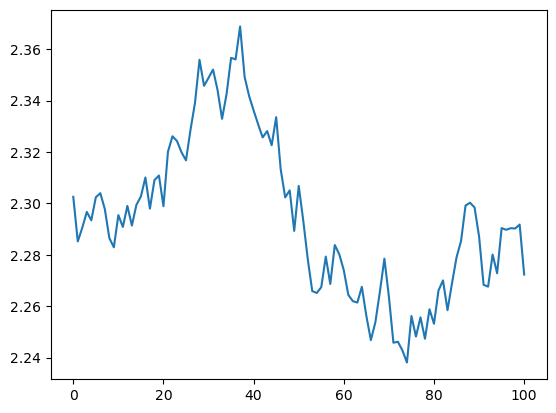

In [44]:
plt.plot(paths['X'][0])

In [36]:
paths['X']

array([[  2.30258509, -14.08541132, -22.69133075, -27.45009264,
        -37.70594108, -44.06286678],
       [  2.30258509,  -3.618229  , -12.95850988, -27.6149946 ,
        -37.47791777, -46.43730545],
       [  2.30258509,  -8.11325764, -16.16020092, -28.65089218,
        -32.23138348, -39.6940483 ],
       [  2.30258509,  -6.47836933, -20.36658692, -25.67432616,
        -37.08946633, -50.96957147],
       [  2.30258509,   1.48947151,   0.12996207, -10.88384423,
        -24.82296298, -34.03489616],
       [  2.30258509,  -1.66318548,  -7.92206398, -11.75243951,
        -22.46902174, -32.14260883],
       [  2.30258509,  -4.96741022, -24.36745539, -37.6273066 ,
        -41.21025171, -48.3944252 ],
       [  2.30258509,  -8.10364081, -11.59056685, -29.01000515,
        -46.15771163, -60.44670475],
       [  2.30258509,  -8.51277101, -23.22837239, -33.08818134,
        -45.59458835, -50.81056287],
       [  2.30258509, -14.00834084, -30.62866705, -38.92932541,
        -57.68256057, -62.2